In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv('C:\\Users\\Dmitry\\Documents\\Учеба\\0 Тестовые задания\\Уралсиб\\Data.txt', sep = ';', encoding = 'cp1251')

In [22]:
data2 = data.copy()

In [23]:
data2 = pd.get_dummies(data, columns = ['Тип товара', 'Регион выдачи кредита', 'Семейное положение'])

In [24]:
def sex(a):
    if a == 'Женский':
        return 0
    else:
        return 1

def education(b):
    if b == 'Неоконченное среднее':
        return 0
    elif b == 'Среднее':
        return 1
    elif b == 'Среднее специальное':
        return 2
    elif b == 'Неоконченное высшее':
        return 3
    elif b == 'Высшее':
        return 4
    elif b == 'Несколько высших или более высокая ступень образования':
        return 5
    
def kids(c):
    if c == 'Детей нет':
        return 0
    else:
        return 1

def client(f):
    if f == 'Не клиент банка':
        return 0
    else:
        return 1

def default(f):
    if f == 'Нет дефолта':
        return 0
    else:
        return 1

In [25]:
data2['Пол'] = data2['Пол клиента'].apply(sex)
data2['Образование'] = data2['Образование клиента'].apply(education)
data2['Дети'] = data2['Наличие детей у клиента'].apply(kids)
data2['Клиент банка'] = data2['Является ли клиентом банка'].apply(client)
data2['Дефолт'] = data2['Флаг дефолта по кредиту'].apply(default)

In [26]:
data2 = data2.drop(columns = ['Пол клиента', 'Образование клиента', 'Наличие детей у клиента', 
                              'Является ли клиентом банка', 'Флаг дефолта по кредиту', 'Оператор связи'])

In [29]:
data2.columns

Index(['Месяц выдачи кредита', 'Сумма кредита', 'Срок кредита',
       'Возраст клиента', 'Доход клиента', 'Тип товара_Автомобильные товары',
       'Тип товара_Аудио, Видео, Фото', 'Тип товара_Бытовая техника',
       'Тип товара_Детские товары (игрушки, детская одежда, детская мебель)',
       'Тип товара_Компьютеры, комплектующие',
       'Тип товара_Косметика и косметические услуги', 'Тип товара_Мебель',
       'Тип товара_Медицинские услуги', 'Тип товара_Мобильные телефоны',
       'Тип товара_Мототехника (лодки, мото)', 'Тип товара_Музыка',
       'Тип товара_Обучение', 'Тип товара_Одежда, изделия из меха и кожи',
       'Тип товара_Окна, двери',
       'Тип товара_Рыболовные и охотничьи принадлежности',
       'Тип товара_Садовая техника', 'Тип товара_Спортивные товары',
       'Тип товара_Строительные и ремонтные услуги',
       'Тип товара_Строительные материалы и инструменты',
       'Тип товара_Туризм и отдых', 'Тип товара_Фитнес',
       'Тип товара_Ювелирные украшения',
  

In [30]:
data2_y = pd.Series(data = data2['Дефолт'])

In [31]:
data2_x = data2.drop(['Дефолт'], axis = 1)

In [32]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data2_x, data2_y, test_size = 0.3, random_state = 1)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
x_test = scaler.fit_transform(x_test)
x_train = scaler.fit_transform(x_train)

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
RFC = RandomForestClassifier(random_state = 1)

In [37]:
RFC.fit(x_train, y_train)

RandomForestClassifier(random_state=1)

In [46]:
from sklearn.metrics import classification_report
report = classification_report(y_test, RFC.predict(x_test), target_names=['Нет дефолта', 'Дефолта'])
print(report)

              precision    recall  f1-score   support

 Нет дефолта       0.90      0.99      0.94       465
     Дефолта       0.33      0.04      0.07        52

    accuracy                           0.90       517
   macro avg       0.62      0.51      0.51       517
weighted avg       0.84      0.90      0.86       517



In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, RFC.predict(x_test))

array([[461,   4],
       [ 50,   2]], dtype=int64)

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
RFC_gr = RandomForestClassifier(random_state = 1)

In [56]:
parameters = {'n_estimators':[10, 20, 50, 100, 200], 'max_depth':[None, 10, 20, 50, 100], 'max_features': 
              ['auto', 'sqrt'], 'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]}

In [57]:
grid = GridSearchCV(RFC_gr, parameters)

In [58]:
grid.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [None, 10, 20, 50, 100],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 20, 50, 100, 200]})

In [60]:
print ('best n_estimators        = ', grid.best_estimator_.n_estimators)
print ('best max_depth           = ', grid.best_estimator_.max_depth)
print ('best max_features        = ', grid.best_estimator_.max_features)
print ('best min_samples_leaf     = ', grid.best_estimator_.min_samples_leaf)
print ('best min_samples_split   = ', grid.best_estimator_.min_samples_split)

best n_estimators        =  100
best max_depth           =  None
best max_features        =  auto
best min_samples_leaf     =  1
best min_samples_split   =  5


In [61]:
RFC_gr = RandomForestClassifier(n_estimators = 100, max_depth = None, max_features = 'auto', min_samples_leaf = 1,
                                min_samples_split = 5, random_state = 1)

In [62]:
RFC_gr.fit(x_train, y_train)

RandomForestClassifier(min_samples_split=5, random_state=1)

In [63]:
report = classification_report(y_test, RFC_gr.predict(x_test), target_names=['Нет дефолта', 'Дефолта'])
print(report)

              precision    recall  f1-score   support

 Нет дефолта       0.90      0.99      0.94       465
     Дефолта       0.33      0.04      0.07        52

    accuracy                           0.90       517
   macro avg       0.62      0.51      0.51       517
weighted avg       0.84      0.90      0.86       517



In [64]:
confusion_matrix(y_test, RFC_gr.predict(x_test))

array([[461,   4],
       [ 50,   2]], dtype=int64)

In [47]:
import lightgbm

In [50]:
LGBM = lightgbm.LGBMClassifier()
LGBM.fit(x_train, y_train)

LGBMClassifier()

In [52]:
report = classification_report(y_test, LGBM.predict(x_test), target_names=['Нет дефолта', 'Дефолта'])
print(report)

              precision    recall  f1-score   support

 Нет дефолта       0.91      0.95      0.93       465
     Дефолта       0.25      0.13      0.18        52

    accuracy                           0.87       517
   macro avg       0.58      0.54      0.55       517
weighted avg       0.84      0.87      0.85       517



In [53]:
confusion_matrix(y_test, LGBM.predict(x_test))

array([[444,  21],
       [ 45,   7]], dtype=int64)

In [65]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state = 1)
ros.fit(data2_x, data2_y)
X_resampled, Y_resampled = ros.fit_sample(data2_x, data2_y)
print('Количество элементов до операции:', len(data2_x))
print('Количество элементов после операции:', len(X_resampled))

Количество элементов до операции: 1723
Количество элементов после операции: 3054


In [66]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X_resampled, Y_resampled, test_size = 0.3, random_state = 1)

In [108]:
RFC_rs = RandomForestClassifier(n_estimators = 100, max_depth = None, max_features = 'auto', min_samples_leaf = 1,
                                min_samples_split = 5, random_state = 1)

In [109]:
RFC_rs.fit(x_train2, y_train2)

RandomForestClassifier(min_samples_split=5, random_state=1)

In [110]:
report = classification_report(y_test2, RFC_rs.predict(x_test2), target_names=['Нет дефолта', 'Дефолта'])
print(report)

              precision    recall  f1-score   support

 Нет дефолта       0.99      0.94      0.96       469
     Дефолта       0.94      0.99      0.96       448

    accuracy                           0.96       917
   macro avg       0.96      0.96      0.96       917
weighted avg       0.96      0.96      0.96       917



In [111]:
confusion_matrix(y_test2, RFC_rs.predict(x_test2))

array([[440,  29],
       [  5, 443]], dtype=int64)

In [97]:
from sklearn.tree import export_graphviz

def get_tree_dot_view(RFC_rs, feature_names=None, class_names=None):
    print(export_graphviz(RFC_rs, out_file=None, filled=True, feature_names=feature_names, class_names=class_names))

In [101]:
#get_tree_dot_view(RFC_rs, list(x_test2.columns), data['Флаг дефолта по кредиту'].unique())

No handles with labels found to put in legend.


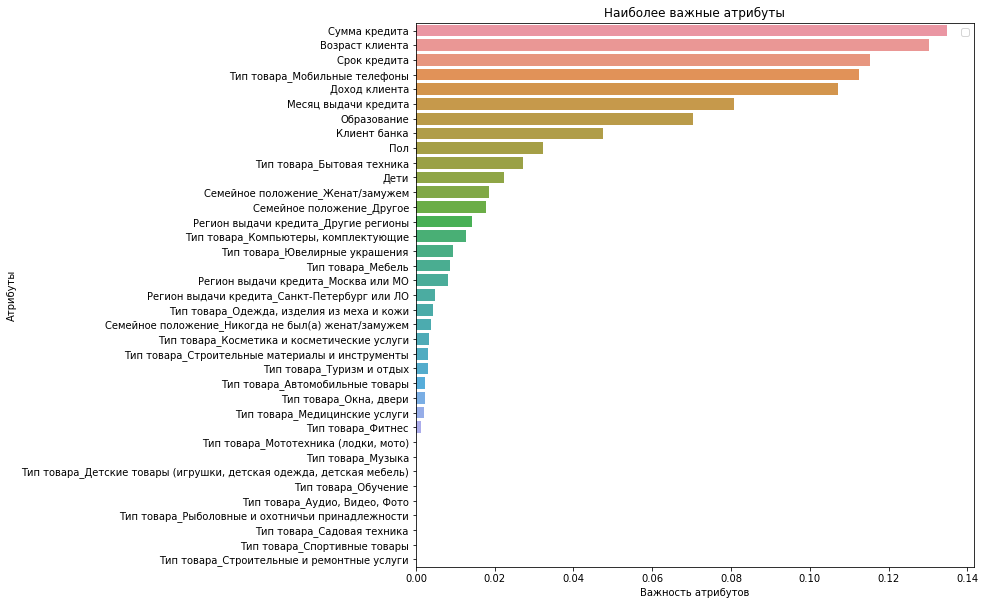

<Figure size 432x288 with 0 Axes>

In [102]:
headers = list(x_train2.columns.values)

feature_imp = pd.Series(RFC_rs.feature_importances_,index=headers).sort_values(ascending=False)

f, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Важность атрибутов')
plt.ylabel('Атрибуты')
plt.title("Наиболее важные атрибуты")
plt.legend()
plt.show()
plt.savefig('Атрибуты')

In [105]:
LGBM_rs = lightgbm.LGBMClassifier()
LGBM_rs.fit(x_train2.values, y_train2.values)

LGBMClassifier()

In [106]:
report = classification_report(y_test2, LGBM_rs.predict(x_test2), target_names=['Нет дефолта', 'Дефолта'])
print(report)

              precision    recall  f1-score   support

 Нет дефолта       0.99      0.88      0.93       469
     Дефолта       0.88      0.99      0.93       448

    accuracy                           0.93       917
   macro avg       0.94      0.93      0.93       917
weighted avg       0.94      0.93      0.93       917



In [107]:
confusion_matrix(y_test2, LGBM_rs.predict(x_test2))

array([[411,  58],
       [  4, 444]], dtype=int64)